In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

start = "2014-01-01"
end = "2023-12-31"

df = yf.download("AAPL", start=start, end=end)
df=df.reset_index()
df.head()


[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.296654,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.916721,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.008968,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.887329,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,16.994274,258529600


In [2]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,19.845715,19.893929,19.715000,19.754642,234684800
1,19.745001,19.775000,19.301071,19.320715,392467600
2,19.194643,19.528570,19.057142,19.426071,412610800
3,19.440001,19.498571,19.211430,19.287144,317209200
4,19.243214,19.484285,19.238930,19.409286,258529600


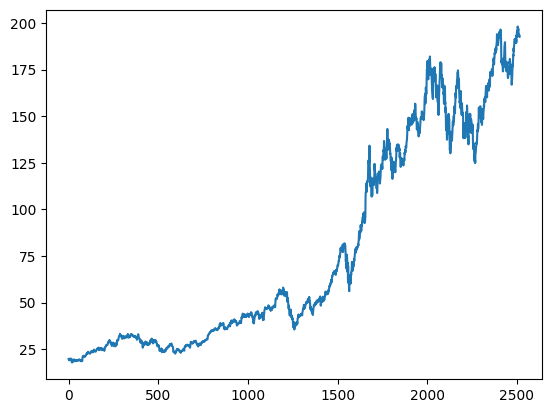

In [3]:
plt.plot(df.Close)

## Moving average 100 days

In [4]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2511    181.768301
2512    181.787101
2513    181.898701
2514    182.046001
2515    182.173301
Name: Close, Length: 2516, dtype: float64

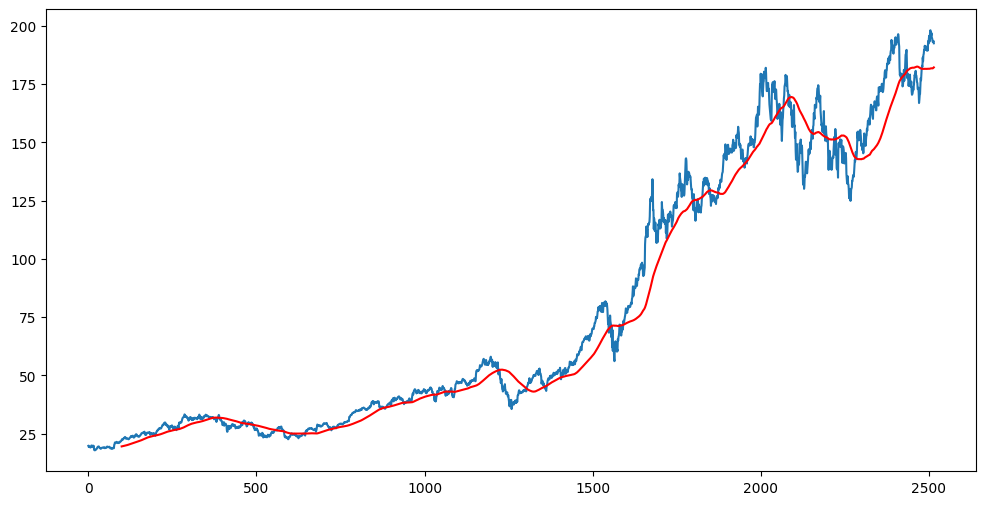

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

## Moving Average 200 days 

In [6]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2511    178.649100
2512    178.871851
2513    179.085250
2514    179.290201
2515    179.487900
Name: Close, Length: 2516, dtype: float64

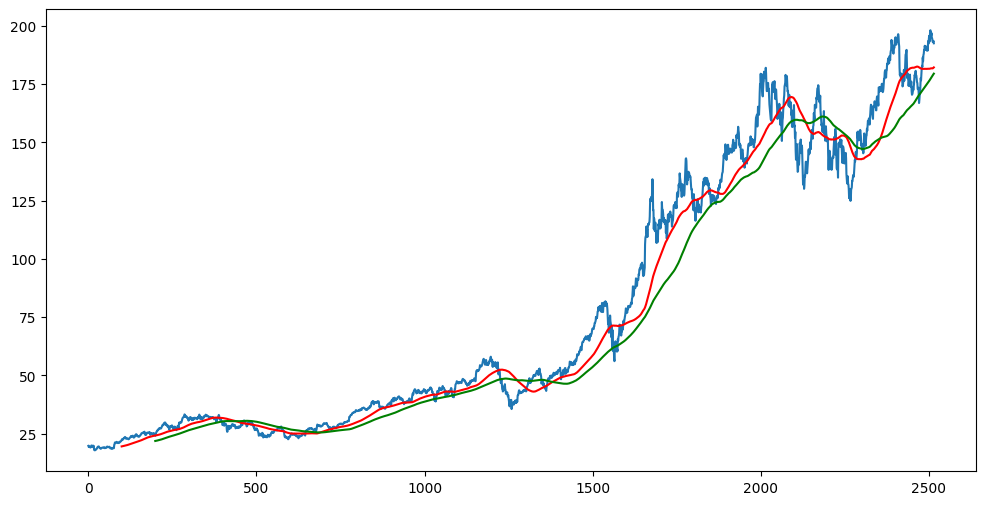

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [8]:
df.shape

(2516, 5)

## Splitting data for train and test

In [9]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [11]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01603287],
       [0.01238153],
       [0.01326806],
       ...,
       [0.96028296],
       [1.        ],
       [0.98468532]])

In [12]:
x_train = [data_training_array[i-100:i] for i in range(100, data_training_array.shape[0])]
y_train = data_training_array[100:, 0]

x_train, y_train = np.array(x_train), np.array(y_train)


In [13]:
x_train.shape

(1661, 100, 1)

## LSTM Model

In [14]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [15]:
model = Sequential()

# Layer 1
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Layer 2
model.add(LSTM(units=60, activation='relu', return_sequences=True))  # Comma added
model.add(Dropout(0.3))

# Layer 3
model.add(LSTM(units=80, activation='relu', return_sequences=True))  # Comma added
model.add(Dropout(0.4))

# Layer 4
model.add(LSTM(units=120, activation='relu'))  # Comma added
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [17]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50

52/52 [==============================] - 23s 252ms/step - loss: 0.0248
Epoch 2/50
52/52 [==============================] - 13s 252ms/step - loss: 0.0043
Epoch 3/50
52/52 [==============================] - 11s 210ms/step - loss: 0.0046
Epoch 4/50
52/52 [==============================] - 11s 209ms/step - loss: 0.0037
Epoch 5/50
52/52 [==============================] - 11s 202ms/step - loss: 0.0038
Epoch 6/50
52/52 [==============================] - 11s 204ms/step - loss: 0.0035
Epoch 7/50
52/52 [==============================] - 11s 208ms/step - loss: 0.0029
Epoch 8/50
52/52 [==============================] - 11s 209ms/step - loss: 0.0033
Epoch 9/50
52/52 [==============================] - 11s 205ms/step - loss: 0.0030
Epoch 10/50
52/52 [==============================] - 10s 201ms/step - loss: 0.0030
Epoch 11/50
52/52 [==============================] - 10s 202ms/step - loss: 0.0029
Epoch 12/50
52/52 [==============================] - 10s 202ms/step - loss: 0.0028
Epoch 13/50

In [21]:
model.save('LSTM_model.h5')

In [22]:
data_testing.head()

,Close
1761,133.720001
1762,132.690002
1763,129.410004
1764,131.009995
1765,126.599998


In [23]:
past_100_days=data_training.tail(100)

In [24]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [25]:
final_df.head()

,Close
0,111.112503
1,112.727501
2,109.375000
3,113.010002
4,115.010002


In [26]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.04681173],
       [0.06450646],
       [0.02777477],
       [0.06760168],
       [0.08951469],
       [0.08839163],
       [0.08510465],
       [0.09556813],
       [0.09715679],
       [0.12528766],
       [0.19206755],
       [0.2083653 ],
       [0.1970527 ],
       [0.21565138],
       [0.19907971],
       [0.19686102],
       [0.24323431],
       [0.29955073],
       [0.26909167],
       [0.1538293 ],
       [0.15470584],
       [0.06551992],
       [0.11482418],
       [0.07286076],
       [0.05653559],
       [0.09334945],
       [0.09532162],
       [0.05795991],
       [0.03834776],
       [0.        ],
       [0.03549913],
       [0.05445383],
       [0.00306789],
       [0.01512003],
       [0.0596034 ],
       [0.08896683],
       [0.07943464],
       [0.09827984],
       [0.10901725],
       [0.06771119],
       [0.10583985],
       [0.06924517],
       [0.09028164],
       [0.08907642],
       [0.11098942],
       [0.19239623],
       [0.15623974],
       [0.157

In [27]:
input_data.shape

(855, 1)

In [28]:
x_test = [input_data[i-100:i] for i in range(100, input_data.shape[0])]
y_test = input_data[100:, 0]

x_test, y_test = np.array(x_test), np.array(y_test)

In [29]:
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


## Making prediction

In [30]:
y_predicted=model.predict(x_test)
y_predicted.shape

24/24 [==============================] - 3s 74ms/step


(755, 1)

In [31]:
scaler.scale_

array([0.0109565])

In [32]:
scale_factor=1/0.0109565
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

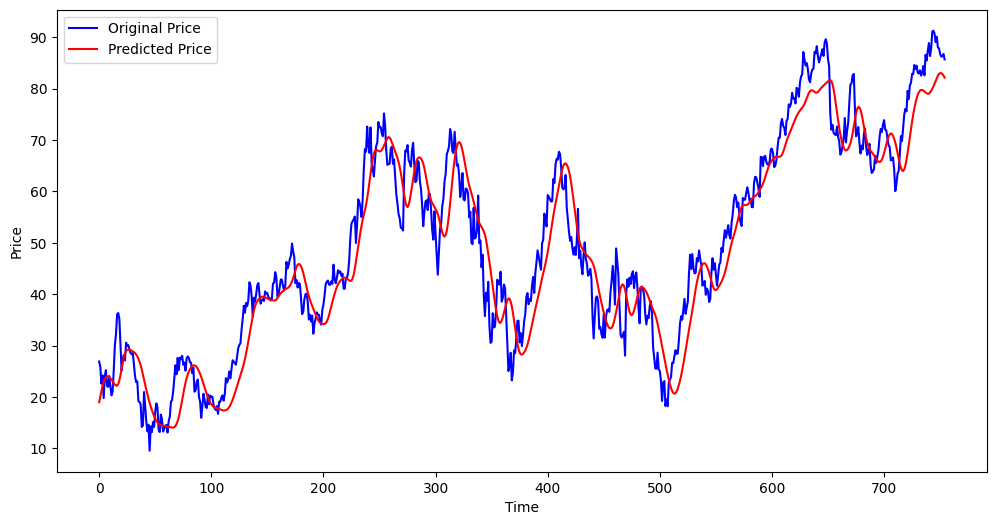

In [33]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()